# Ride-Sharing Zuber Analysis
Project Report by Allentine Paulis

# Table of Contents
* [Project Description](#description)
* [Data](#data)
    * [Table Scheme](#scheme)
    * [Tasks Plan](#plan)
* [Step 1. Data Parsing / Scraping](#parsing)
* [Step 2. Working with Databases : Exploratory data analysis - SQL](#eda)
* [Step 3. Hypotheses Testing - SQL](#hypotest)
* [Step 4. Exploratory data analysis - Python](#eda2)
    * [Companies](#companies)
    * [Dropoffs](#dropoffs)
    * [Loop Ohare](#loopohare)
* [Step 5. Hypotheses Testing - Python](#hypotest2)
* [Step 6. Overall conclusion](#allconclusion)

# Project Description <a class="anchor" id="description"></a>
As an analyst for Zuber, a new ride-sharing company that's launching in Chicago, the task project is to find patterns what affects a taxi trip. We want to understand passenger preferences and the impact of external factors on rides.
We will study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

# Data <a class="anchor" id="data"></a>
A database with info on taxi rides in Chicago:
`neighborhoods` table: data on city neighborhoods
- *name*: name of the neighborhood
- *neighborhood_id*: neighborhood code


`cabs table`: data on taxis
- *cab_id*: vehicle code
- *vehicle_id*: the vehicle's technical ID
- *company_name*: the company that owns the vehicle


`trips table`: data on rides
- *trip_id*: ride code
- *cab_id*: code of the vehicle operating the ride
- *start_ts*: date and time of the beginning of the ride (time rounded to the hour)
- *end_ts*: date and time of the end of the ride (time rounded to the hour)
- *duration_seconds*: ride duration in seconds
- *distance_miles*: ride distance in miles
- *pickup_location_id*: pickup neighborhood code
- *dropoff_location_id*: dropoff neighborhood code


`weather_records` table: data on weather
- *record_id*: weather record code
- *ts*: record date and time (time rounded to the hour)
- *temperature*: temperature when the record was taken
- *description*: brief description of weather conditions, e.g. "light rain" or "scattered clouds"

## Table Scheme  <a class="anchor" id="scheme"></a>

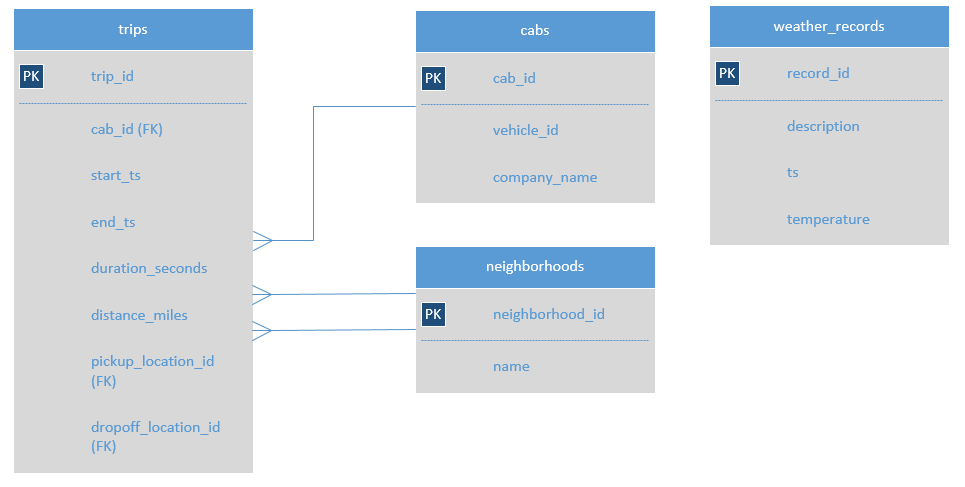

Note: there isn't a direct connection between the tables trips and weather_records in the database. But we can still use JOIN and link them using the time the ride started (trips.start_ts) and the time the weather record was taken (weather_records.ts).

## Tasks Plan <a class="anchor" id="plan"></a>

**Step 1**: Parse the data using on weather in Chicago in November 2017 from the website: https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html using Beautiful Soup.


**Step 2**: Working with Databases : Exploratory data analysis - SQL

1. Find the number of taxi rides for each taxi company for November 15-16, 2017. Name the resulting field trips_amount and print it along with the company_name field. Sort the results by the trips_amount field in descending order.
2. Find the number of rides for every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017. Name the resulting variable trips_amount. Group the results by the company_name field.
3. In November 2017, the most popular taxi companies were Flash Cab and Taxi Affiliation Services. Find the number of rides for these two companies and name the resulting variable trips_amount. Join the rides for all other companies in the group "Other." Group the data by taxi company names. Name the field with taxi company names company. Sort the result in descending order by trips_amount.
4. Find out where rides most often end. Find the average number of drop-offs that occurred daily in each Chicago neighborhood in November 2017. Name the resulting field average_trips. To retrieve the names of the neighborhoods, use the name field from the neighborhoods table. Rename it as dropoff_location_name in the resulting table. Sort the result in descending order by average_trips.


**Step 3**: Test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturday.

1. Retrieve the identifiers of the O'Hare and Loop neighborhoods from the neighborhoods table.
2. For each hour, retrieve the weather condition records from the weather_records table. Using the CASE operator, break all hours into two groups: "Bad" if the description field contains the words '"rain" or "storm," and "Good" for others. Name the resulting field weather_conditions. The final table must include two fields: date and hour (ts) and weather_conditions.
3. Retrieve from the trips table all the rides that started in the Loop (neighborhood_id: 50) and ended at O'Hare (neighborhood_id: 63) on a Sunday. Get the weather conditions for each ride. Use the method you applied in the previous task. Also retrieve the duration of each ride. Ignore rides for which data on weather conditions is not available.



**Step 4**: Exploratory data analysis (Python). We have files that contain the data retrieved with queries from the previous tasks. project_sql_result_01.csv — the result of the first query. It contains the following data: company_name: taxi company name trips_amount: the number of rides for each taxi company on November 15-16, 2017. project_sql_result_04.csv — the result of the second query. It contains the following data: dropoff_location_name: Chicago neighborhoods where rides ended average_trips: the average number of rides that ended in each neighborhood in November 2017.


**Step 5**: Testing hypotheses (Python) project_sql_result_07.csv — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values: start_ts pickup date and time weather_conditions weather conditions at the moment the ride started duration_seconds ride duration in seconds Test the hypothesis: "The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Sundays."

# Step 1.  Data Parsing / Scraping <a class="anchor" id="parsing"></a>

In [82]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup 
URL='https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html'
req = requests.get(URL) # GET-request
soup = BeautifulSoup(req.text, 'lxml')

table = soup.find('table', attrs={"id": "weather_records"})

heading_table=[]
for row in table.find_all('th'):
    heading_table.append(row.text)
    
content=[]
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns = heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


# Step 2. Working with Databases : Exploratory Data Analysis - SQL <a class="anchor" id="eda"></a>

``` mysql
/**
1.Print the company_name field. 
Find the number of taxi rides for each taxi company for November 15-16, 2017, 
name the resulting field trips_amount, and print it, too. 
Sort the results by the trips_amount field in descending order.
**/

SELECT cabs.company_name, COUNT(trip_id) AS trips_amount
FROM cabs INNER JOIN trips USING(cab_id)
WHERE start_ts::date BETWEEN '2017-11-15' AND '2017-11-16'
GROUP BY cabs.company_name
ORDER BY trips_amount DESC;
```

Result: 
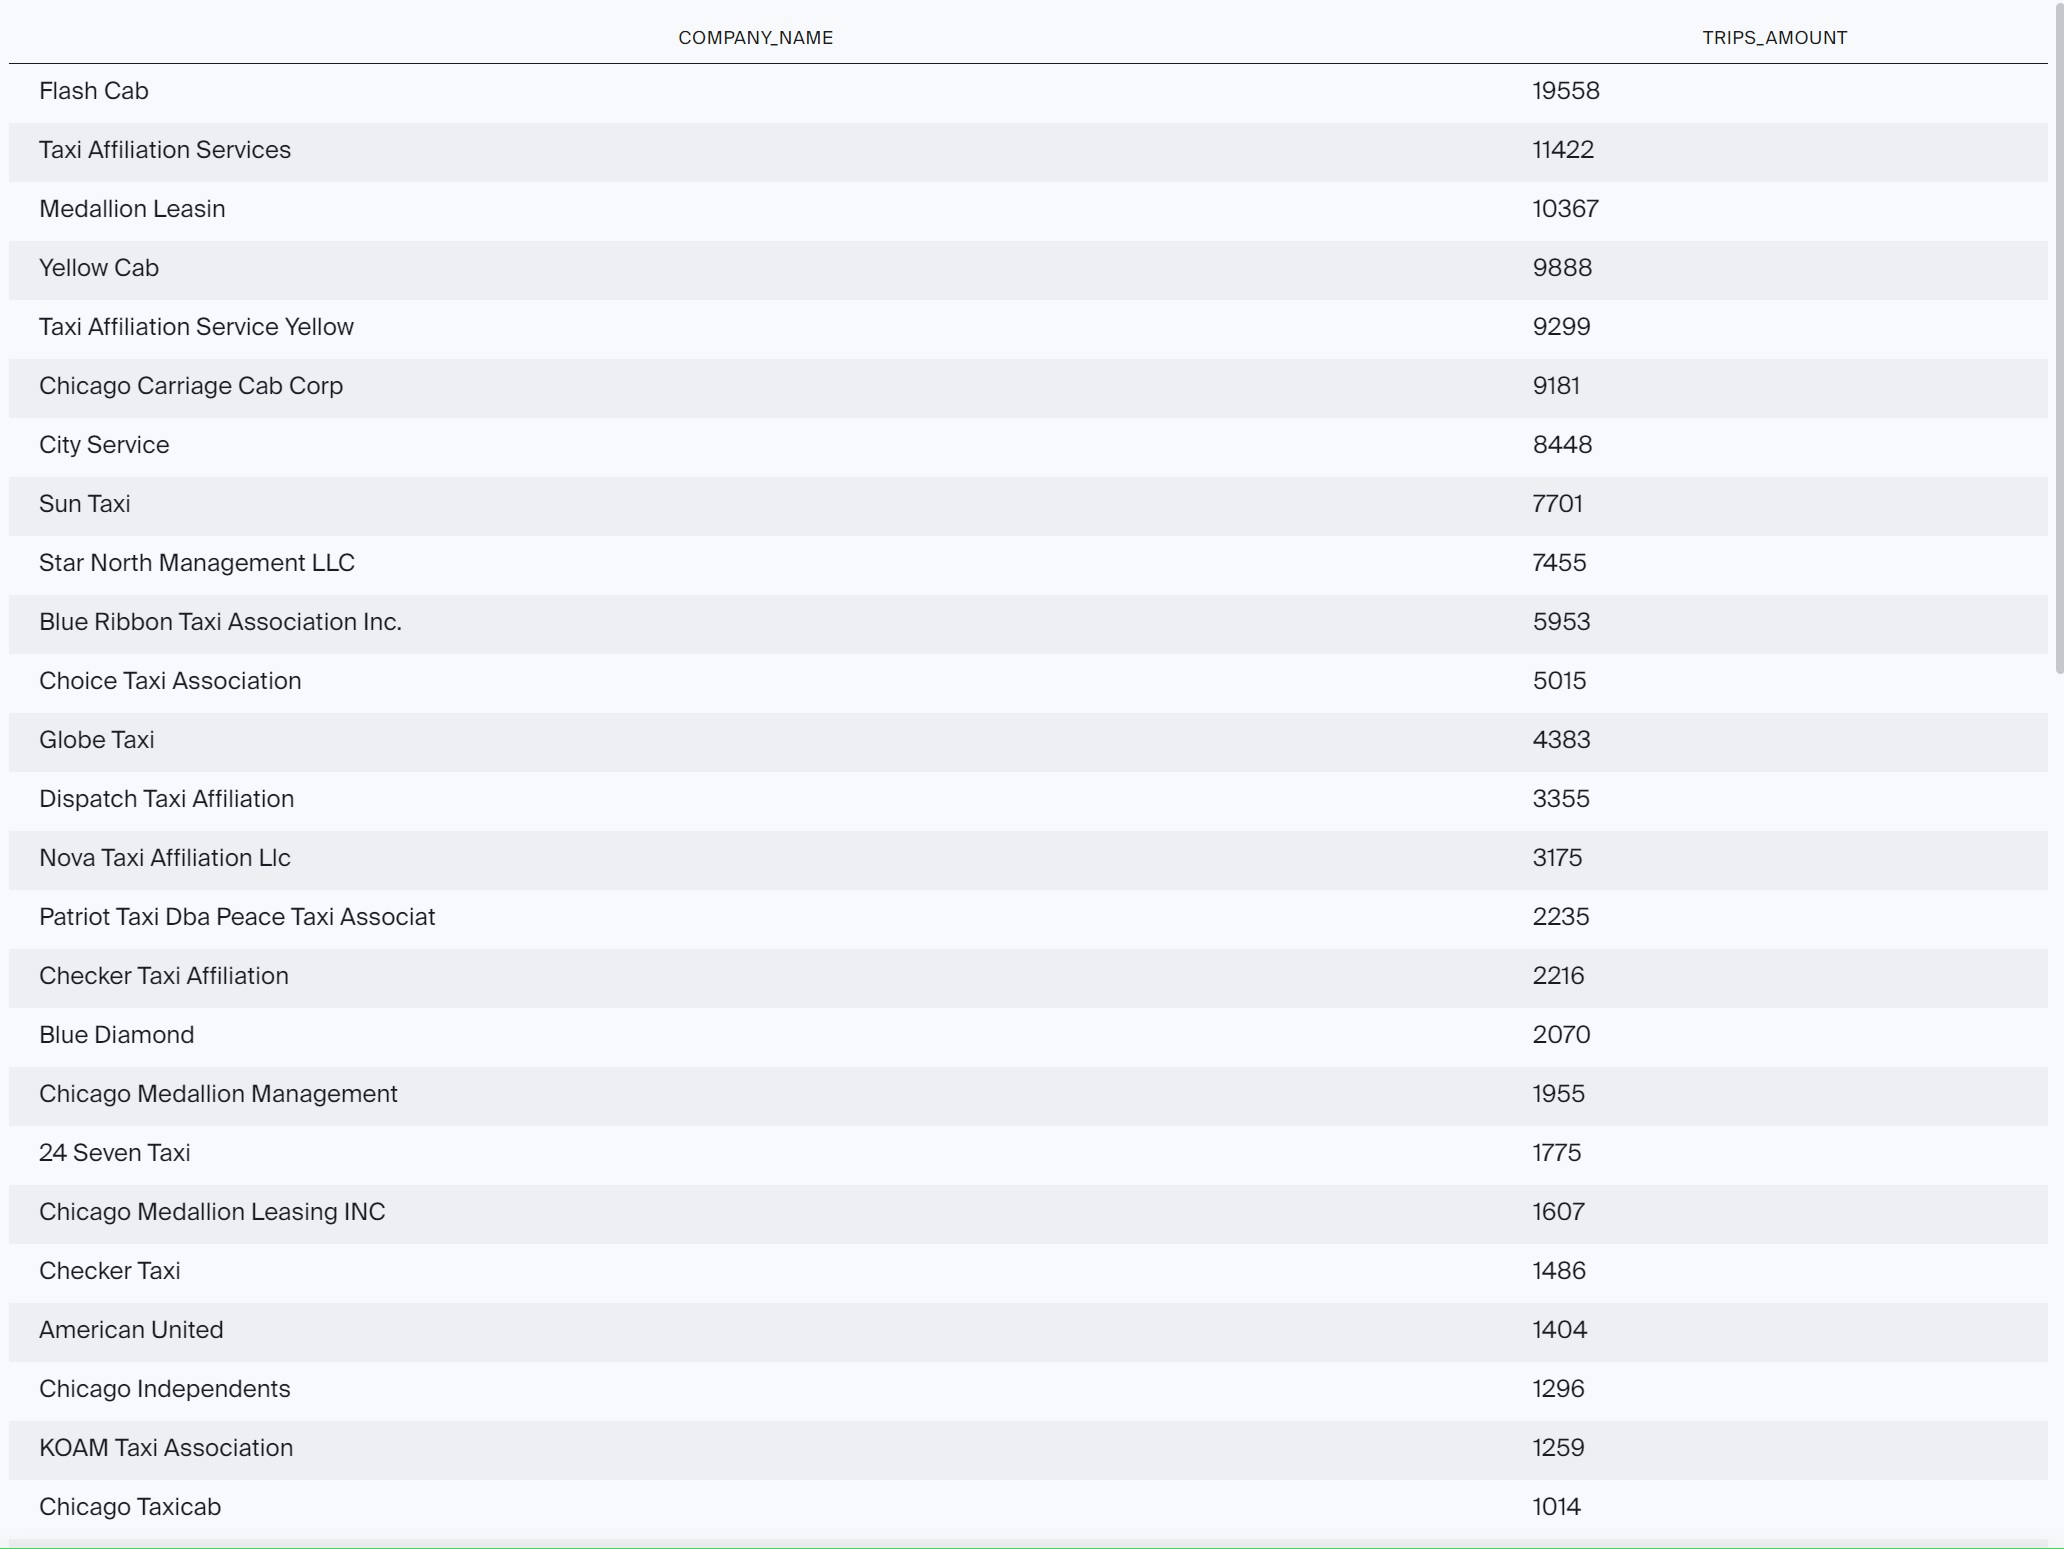
(only partial result shown)

``` mysql
/**
2.
Find the number of rides for every taxi company whose name 
contains the words "Yellow" or "Blue" for November 1-7, 2017. 
Name the resulting variable trips_amount. Group the results by the company_name field.
**/

SELECT cabs.company_name, COUNT(trip_id) AS trips_amount
FROM cabs INNER JOIN trips USING(cab_id)
WHERE 
    start_ts::date >='2017-11-01' 
    AND start_ts::date < '2017-11-08' AND
    (company_name LIKE '%Yellow%' OR company_name LIKE '%Blue%')
GROUP BY cabs.company_name;

```

Result:
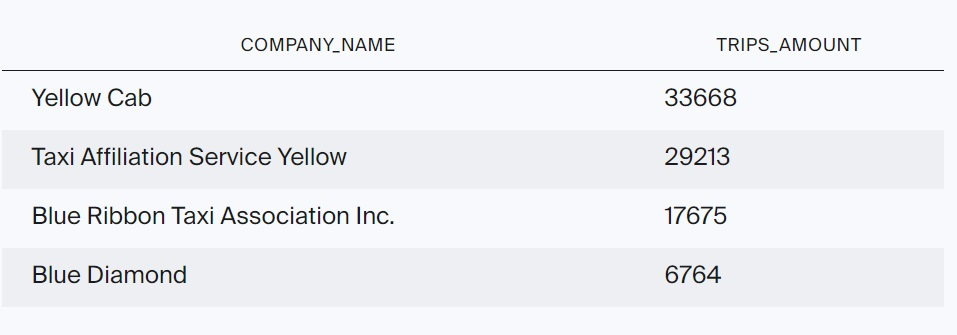

``` mysql
/**
3.
For November 1-7, 2017, the most popular taxi companies were Flash Cab and Taxi Affiliation Services. 
Find the number of rides for these two companies and name the resulting variable trips_amount. 
Join the rides for all other companies in the group "Other." Group the data by taxi company names. 
Name the field with taxi company names company. Sort the result in descending order by trips_amount.
**/


SELECT
    CASE 
        WHEN company_name = 'Flash Cab' THEN 'Flash Cab' 
        WHEN company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services' 
        ELSE 'Other' 
    END AS company,
    COUNT(trips.trip_id) as trips_amount                
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY 
    company
ORDER BY 
    trips_amount DESC;


```

Result:
    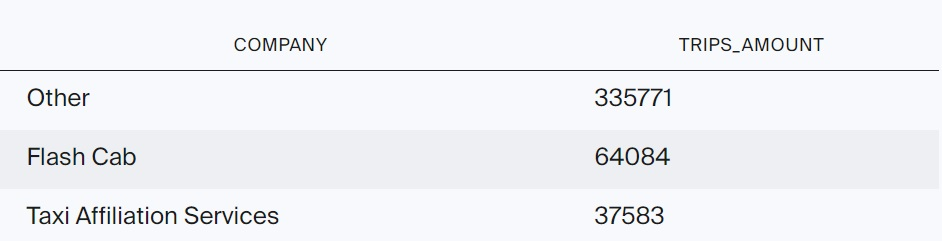

``` mysql
/**
4. Find out where rides most often end. Find the average daily number of drop-offs in each Chicago neighborhood in the month that we have data for (November 2017). Name the resulting field average_trips. To retrieve the names of the neighborhoods, use the name field from the neighborhoods table. Rename it as dropoff_location_name in the resulting table. Sort the result in descending order by average_trips. 
**/

SELECT name AS dropoff_location_name, AVG(cnt_amount) AS average_trips
FROM (SELECT name, extract('day' FROM end_ts) AS day, COUNT(*) cnt_amount
      FROM trips
               LEFT JOIN neighborhoods on trips.dropoff_location_id = neighborhoods.neighborhood_id
      GROUP BY name, extract('day' from end_ts)) as subq
GROUP BY name
ORDER BY average_trips DESC

```

Result:
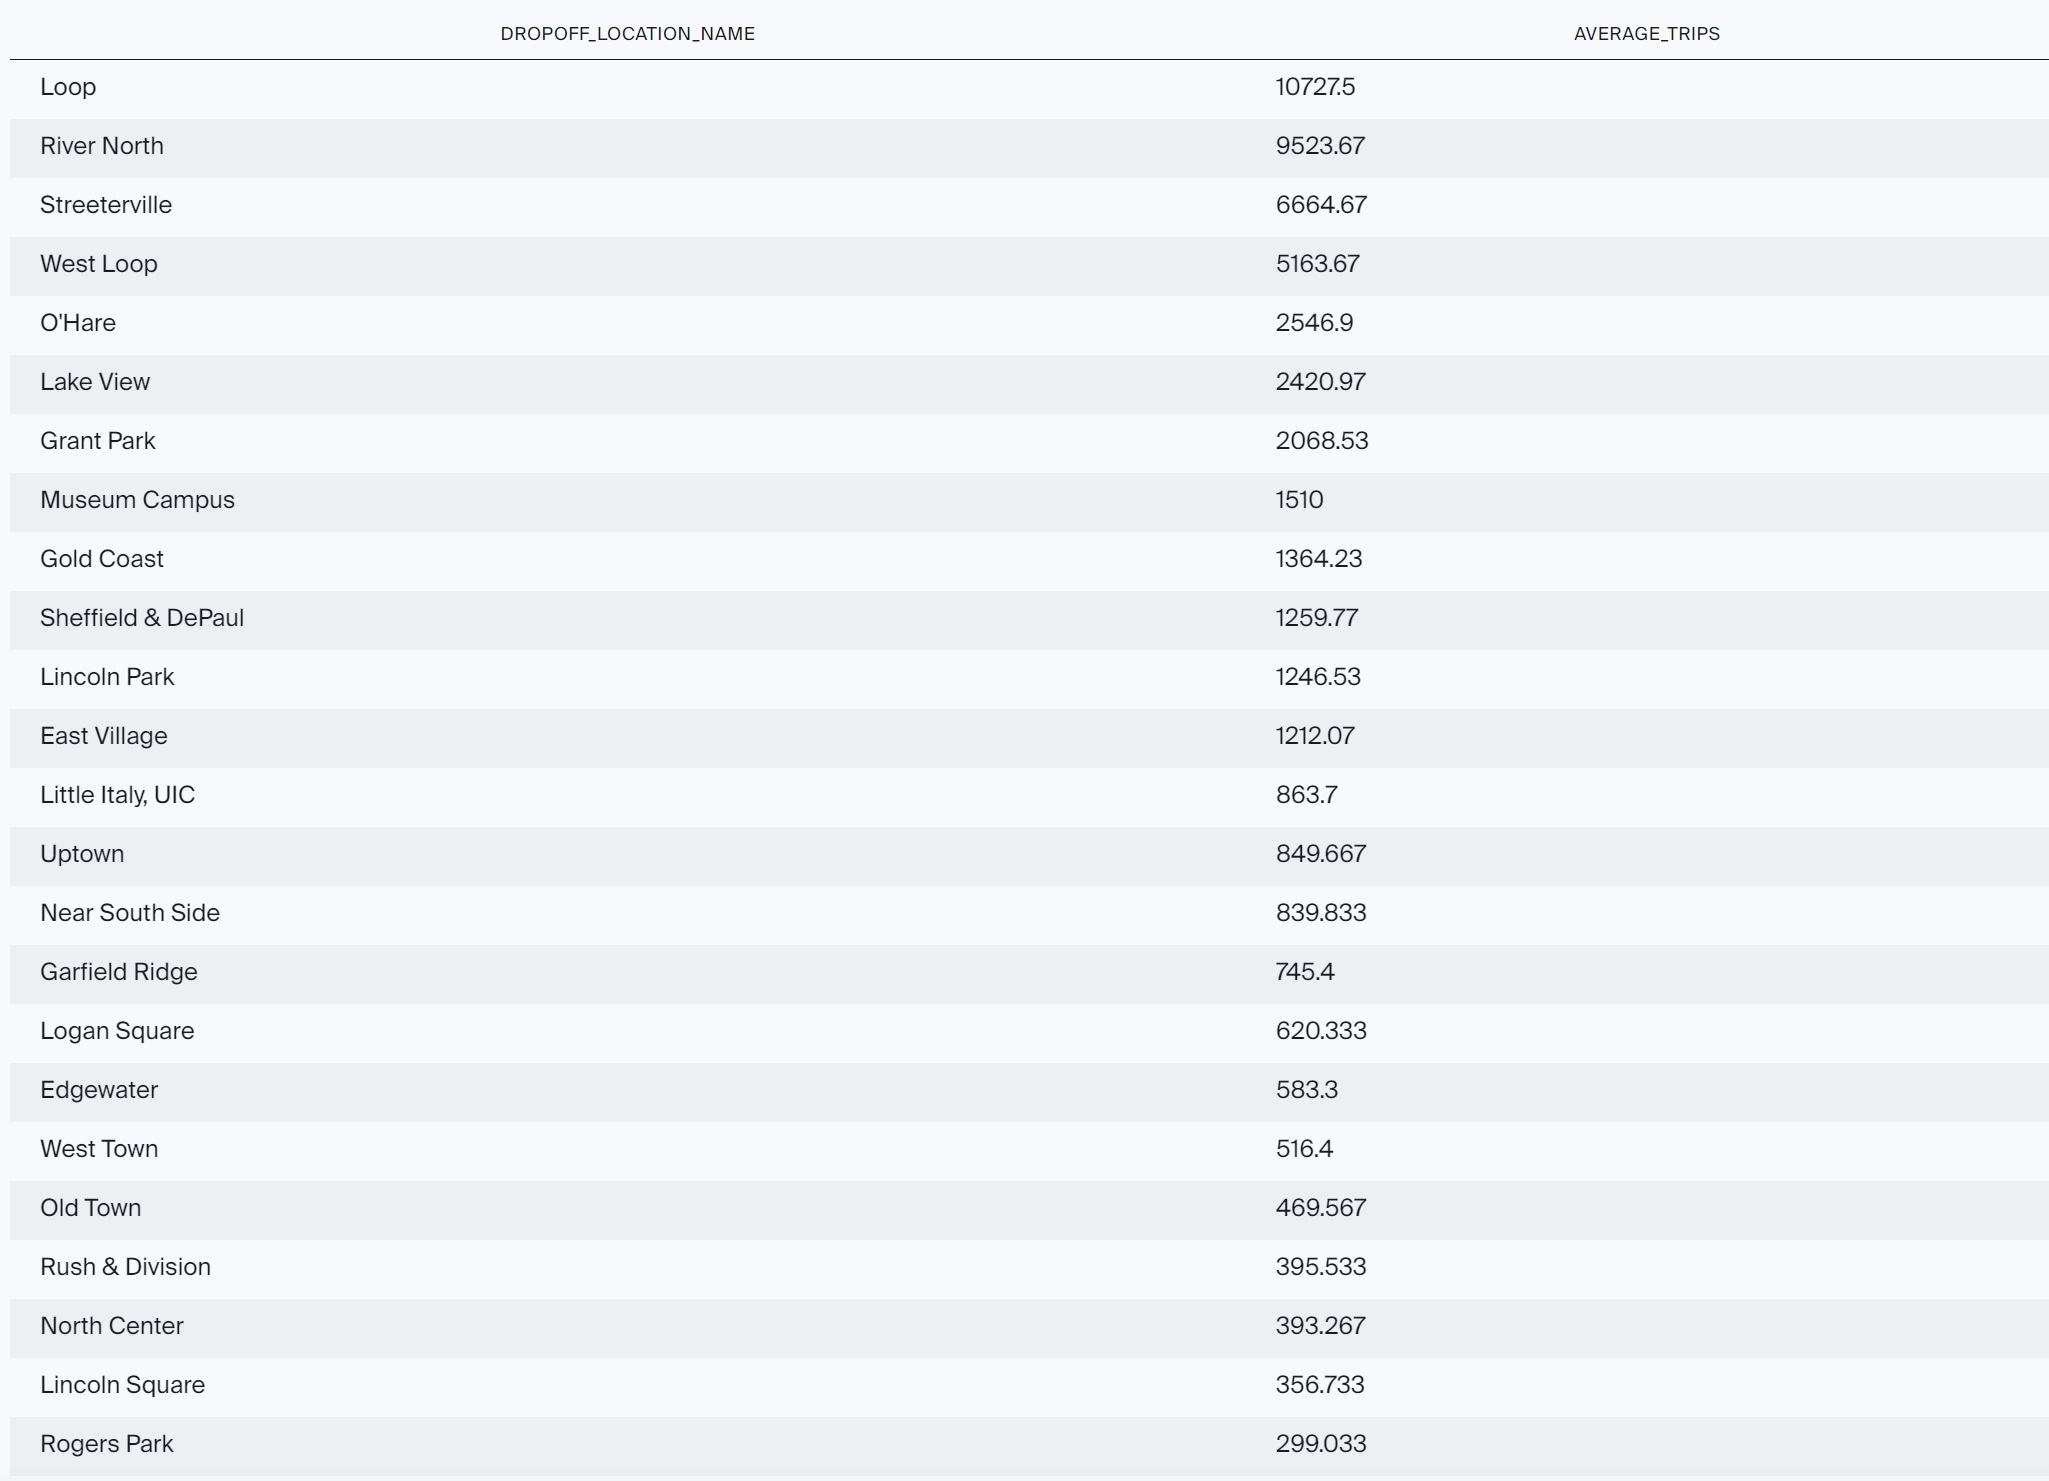
(only partial result shown)

## Conclusion
- Based on samples of November 15-16, 2017, the most succesful taxi company based on the number of taxi rides are **Flash Cab** and **Taxi Affiliate Service**
- For every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017, **Yellow Cab** has the most trips. The common taxi color associating with Yellow color seem successful. 
- Taxi Affiliate Service has yellow color and associate with yellow cab and yellow group based on google search.
- Flash Cab has white and blue color based on google search and Flash Cab website.
- The rides most often end in **Loop** neighborhood and **River North** neighborhood. 

# Step 3. Hypotheses Testing - SQL  <a class="anchor" id="hypotest"></a>
Test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturdays.

```mysql
/**
5.
Retrieve the identifiers of the O'Hare and Loop neighborhoods from the neighborhoods table.
From Hint - neighborhood_id and name
**/

SELECT neighborhood_id, name
FROM neighborhoods 
WHERE LOWER(name) like '%hare%' OR LOWER(name) like 'loop%' ;

```

Result:
    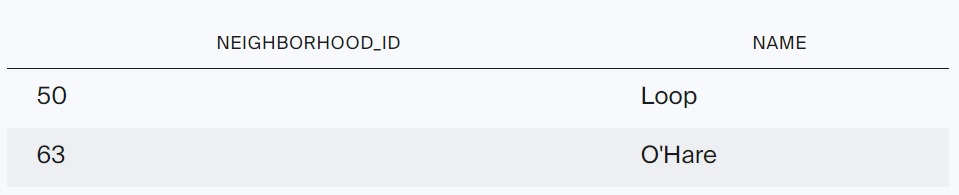

```mysql
/**
6.
For each hour, retrieve the weather condition records from the weather_records table. 
Using the CASE operator, break all hours into two groups: 
  Bad if the description field contains the words rain or storm, and Good for others. 
Name the resulting field weather_conditions.
 The final table must include two fields: date and hour (ts) and weather_conditions.
**/

SELECT
    ts,
    CASE
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM 
    weather_records;
```

Result:
    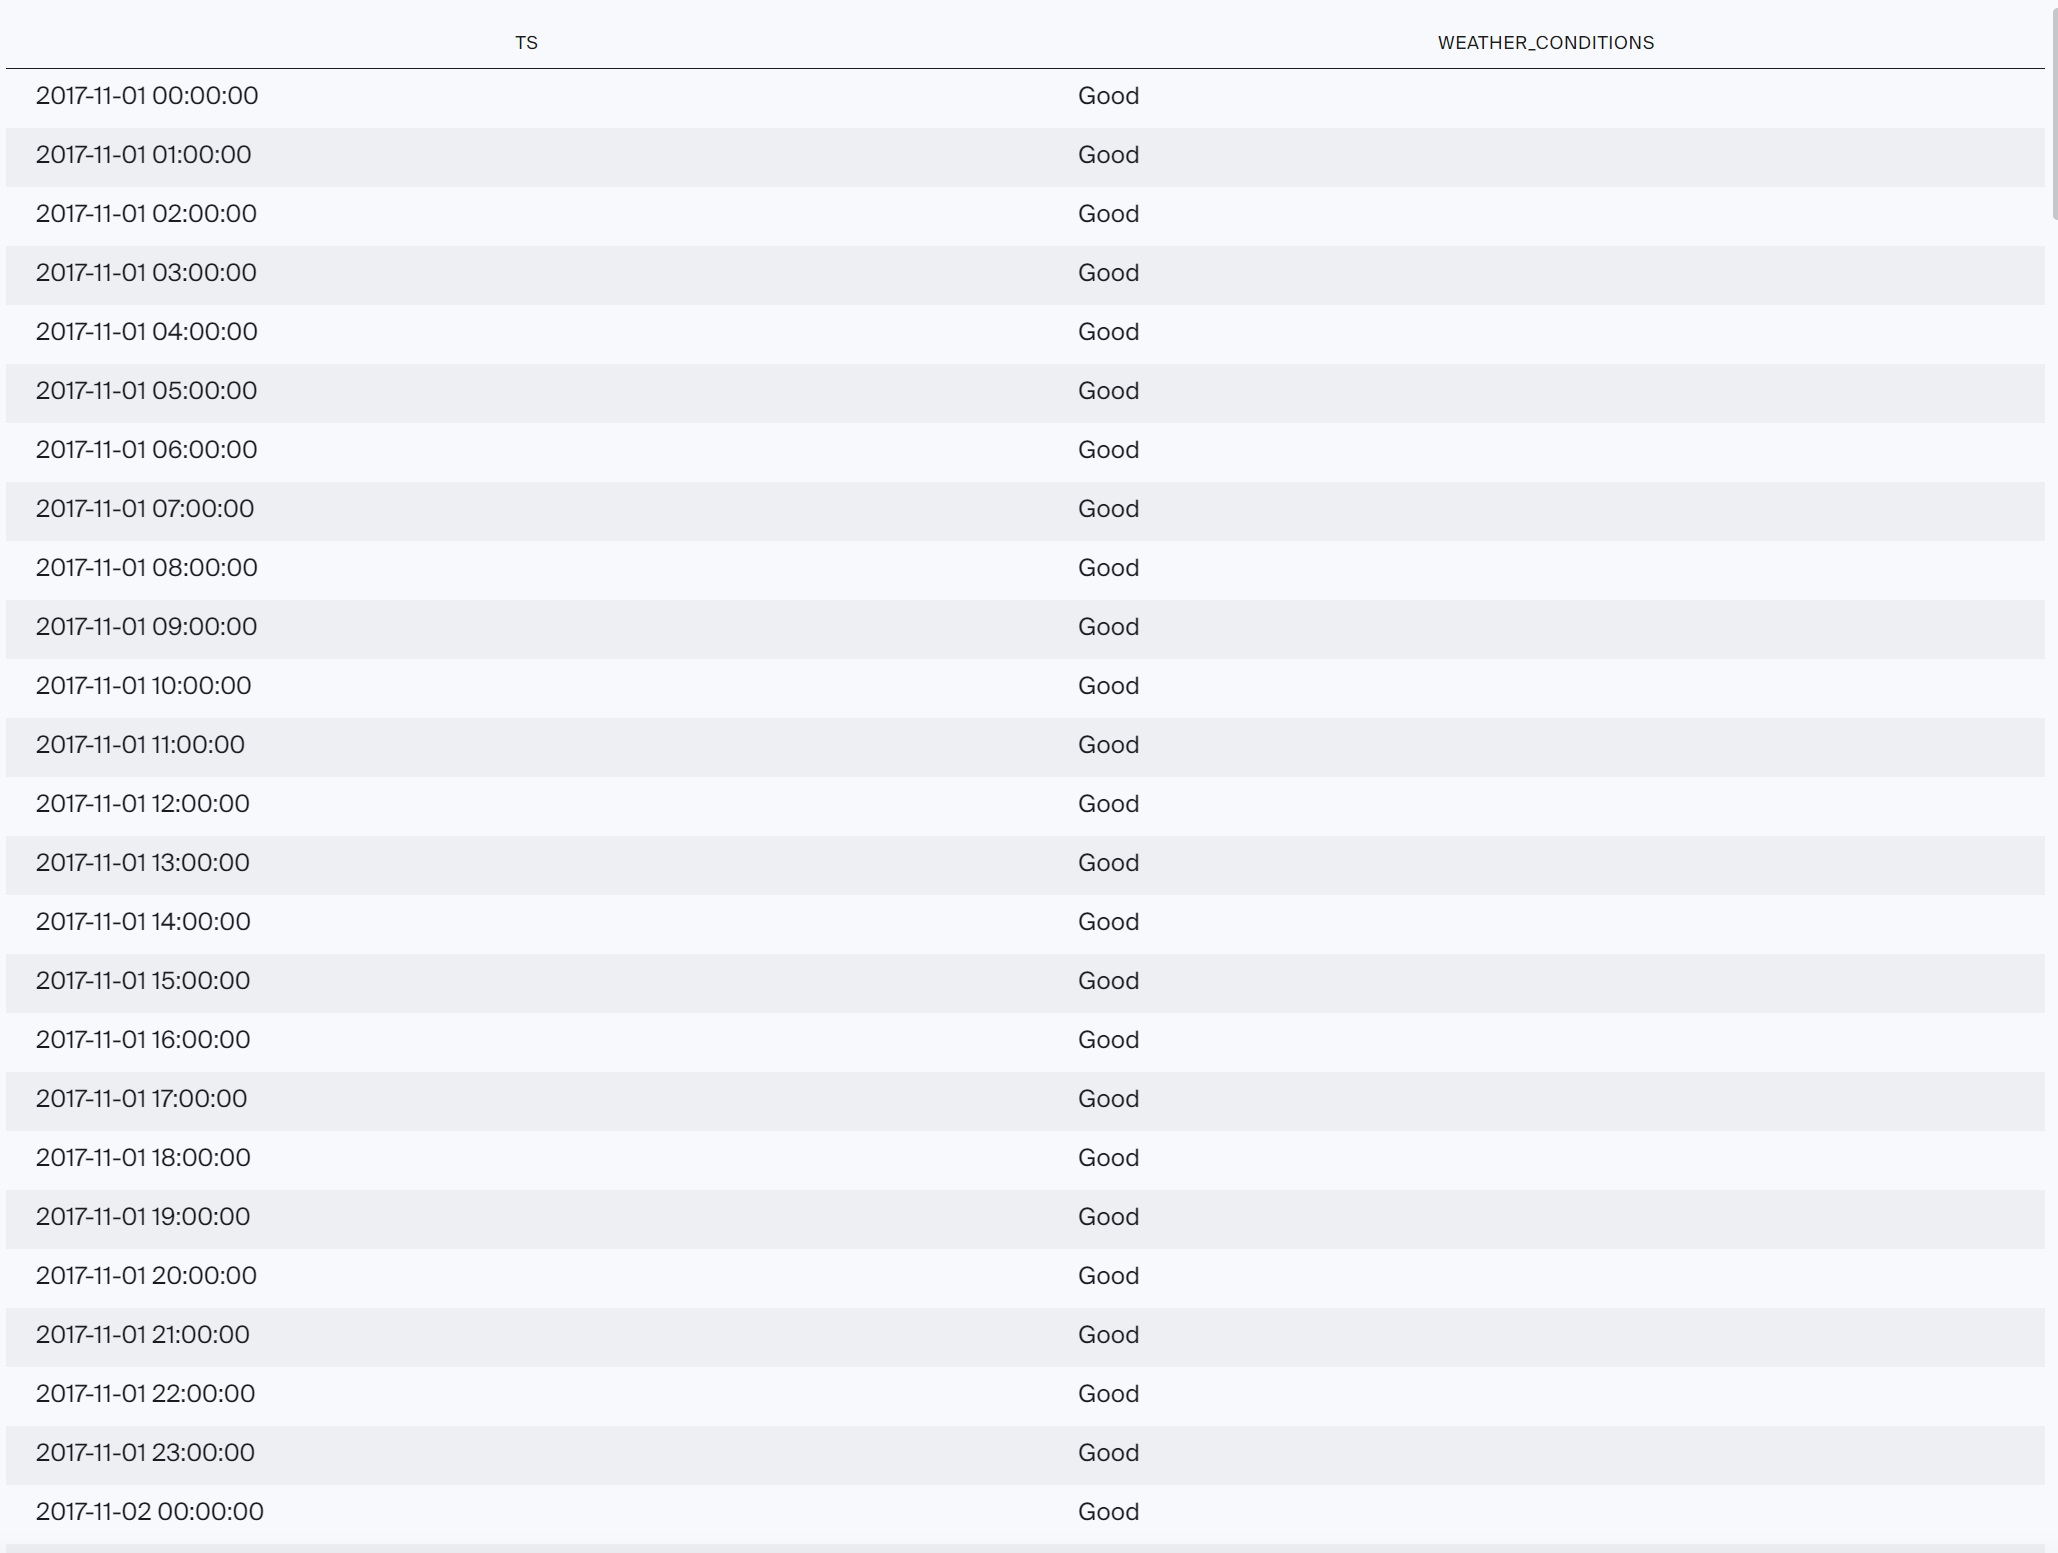
(only partial results shown)

```mysql
/**
7.
Retrieve from the trips table all the rides that started in the Loop (neighborhood_id: 50) on a Saturday 
and ended at O'Hare (neighborhood_id: 63). 
Get the weather conditions for each ride. Use the method you applied in the previous task. 
Also retrieve the duration of each ride. Ignore rides for which data on weather conditions is not available.
The table columns should be in the following order:
start_ts
weather_conditions
duration_seconds
Sort by trip_id.
**/

SELECT
    start_ts,
    T.weather_conditions,
    duration_seconds
FROM 
    trips
INNER JOIN (
    SELECT
        ts,
        CASE
            WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
            ELSE 'Good'
        END AS weather_conditions
    FROM 
        weather_records          
) T on T.ts = trips.start_ts
WHERE 
    pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT (DOW from trips.start_ts) = 6
ORDER BY trip_id
```

Result:
    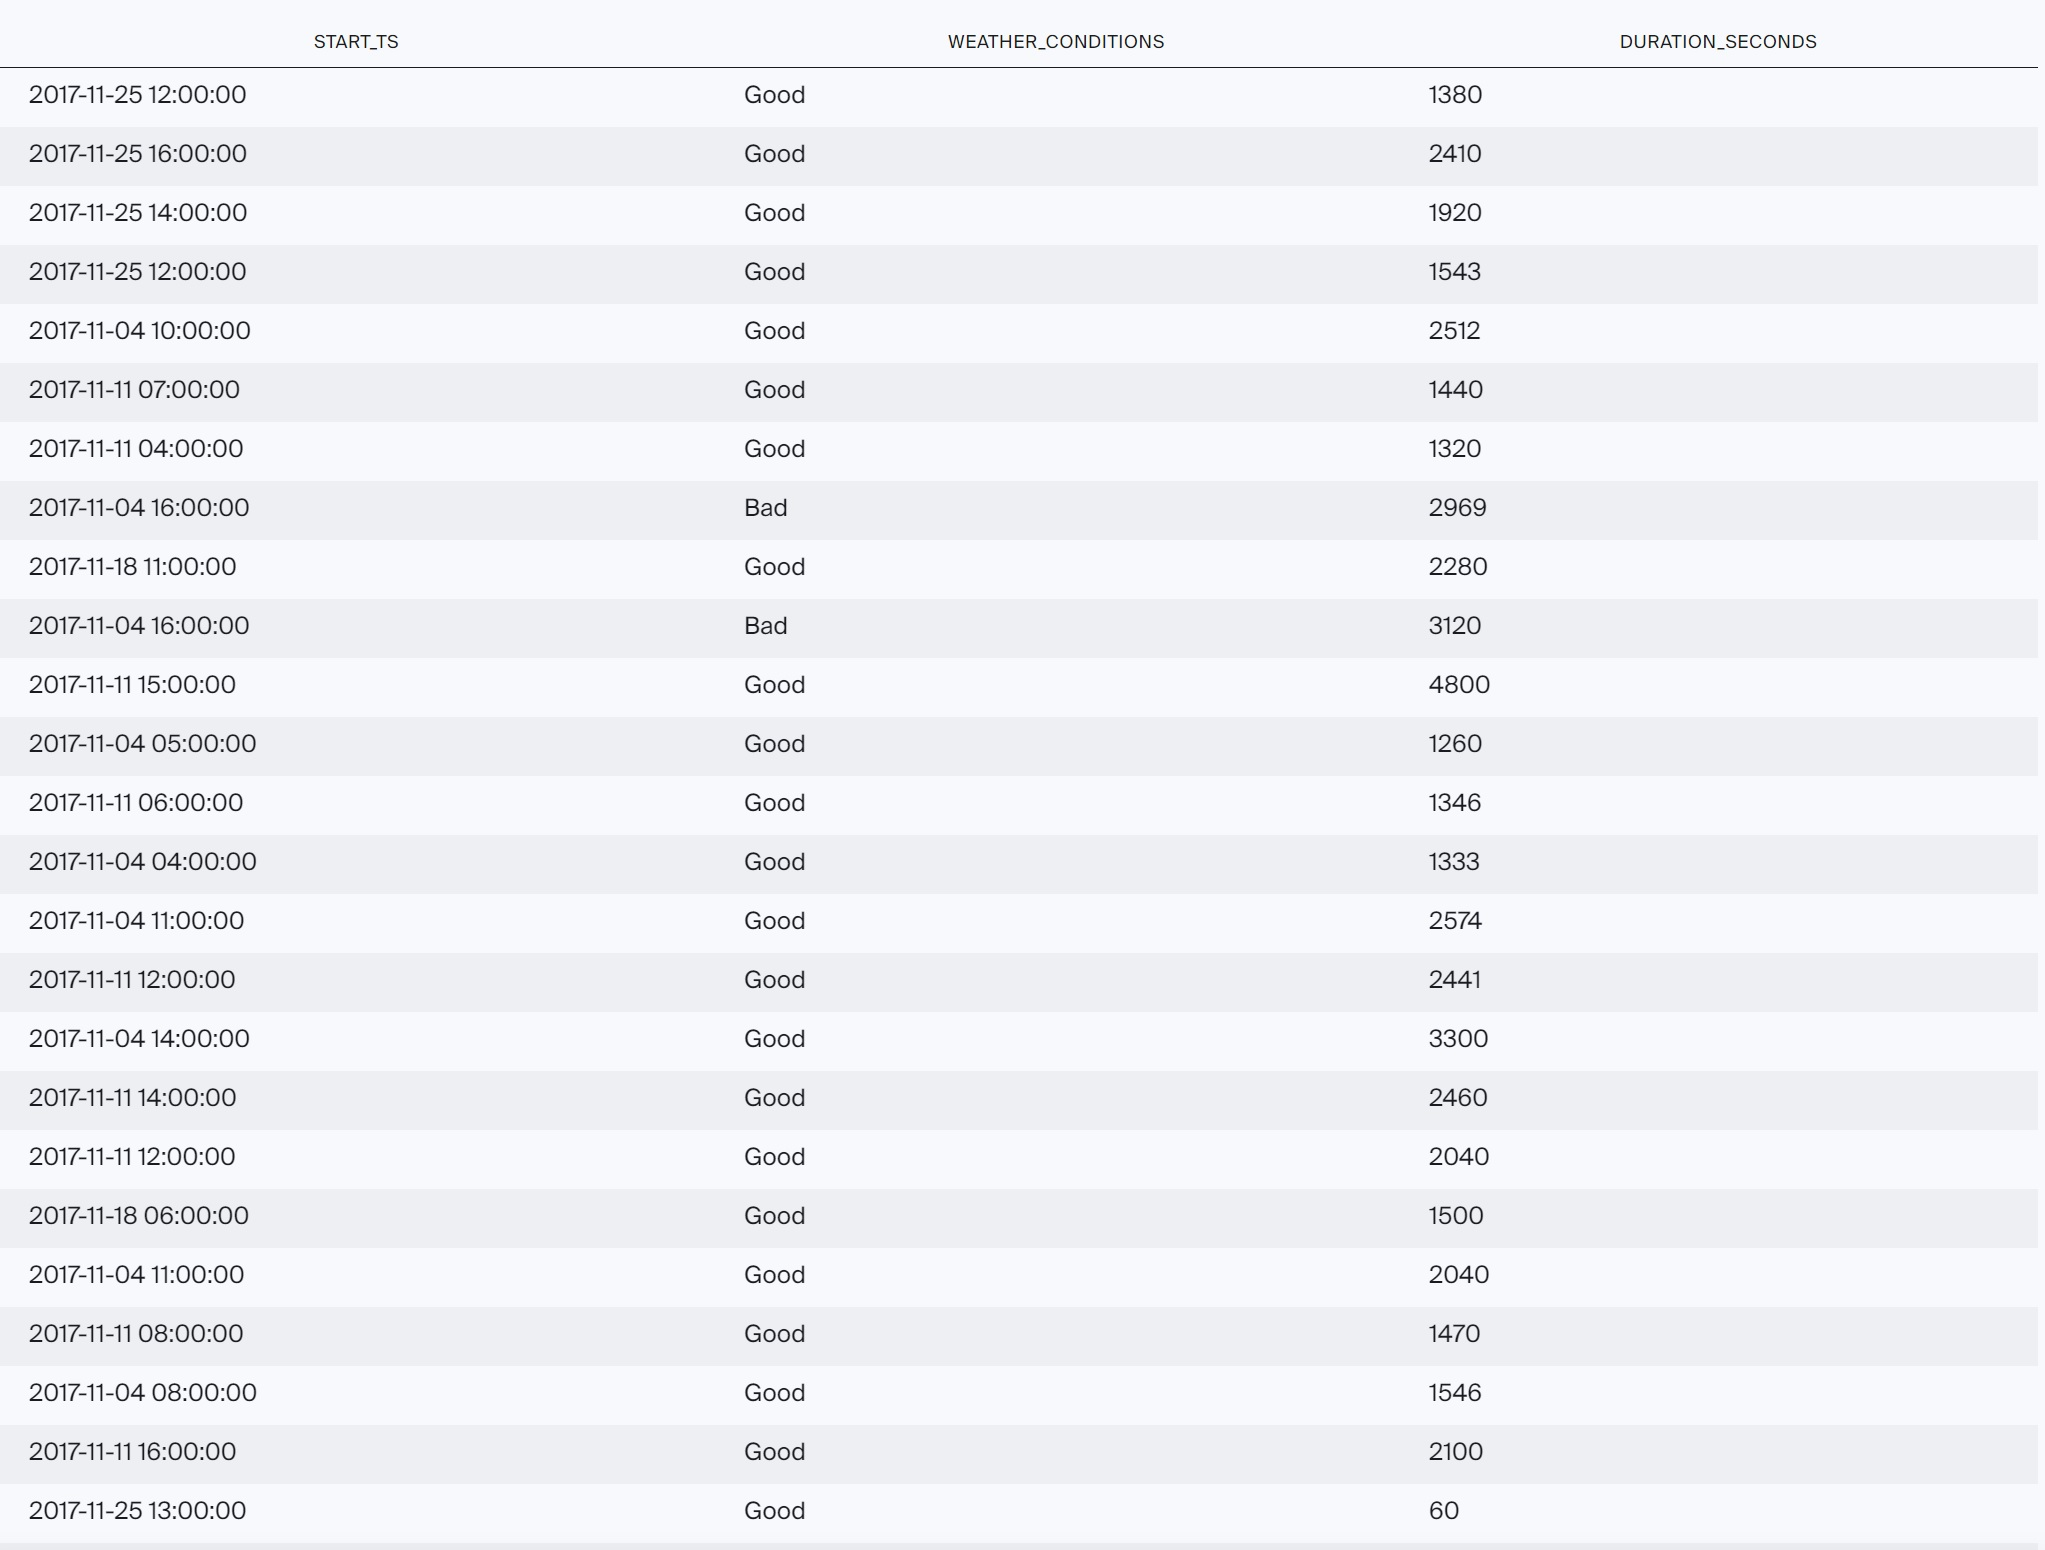
    (only partial results shown)

## Conclusion
- Testing the hypothesis: **the duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays**. This is a **true** statement based on observations from November 2017. The average trip duration on Saturdays with **bad** weather (rain or storm) have **longer** duration than the average trip duration on 'good' weather days.

# Step 4. Exploratory Data Analysis - Python <a class="anchor" id="eda2"></a>

The data retrieved from SQL tasks is saved in three CSV files: 

`project_sql_result_01.csv`. It will be saved in `companies` dataframe variable. It contains the following data:

- *company_name*: taxi company name
- *trips_amount*: the number of rides for each taxi company on November 15-16, 2017.


`project_sql_result_04.csv`. It will be saved in `dropoffs` dataframe variable. It contains the following data:

- *dropoff_location_name*: Chicago neighborhoods where rides ended
- *average_trips*: the average number of rides that ended in each neighborhood in November 2017.

`project_sql_result_07.csv` It will be saved in `loop_ohare` dataframe variable. It contains data on rides from the Loop to O'Hare International Airport. It contains the following data:

- *start_ts* : pickup date and time
- *weather_conditions* : weather conditions at the moment the ride started
- *duration_seconds* : ride duration in seconds

In [83]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [84]:
companies = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv')
dropoffs = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv')
loop_ohare = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv')

## Companies <a class="anchor" id="companies"></a>

In [85]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


It's correct Data Types

In [86]:
companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [87]:
companies.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [88]:
companies.describe(include='object')

,company_name
count,64
unique,64
top,3591 - 63480 Chuks Cab
freq,1


In [89]:
companies.isna().sum()

company_name    0
trips_amount    0
dtype: int64

No missing values

In [90]:
companies.duplicated().sum()

0

No duplicate

In [91]:
companies['company_name'].nunique()

64

There is 64 unique company name and there is total 64 rows.

In [92]:
companies['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

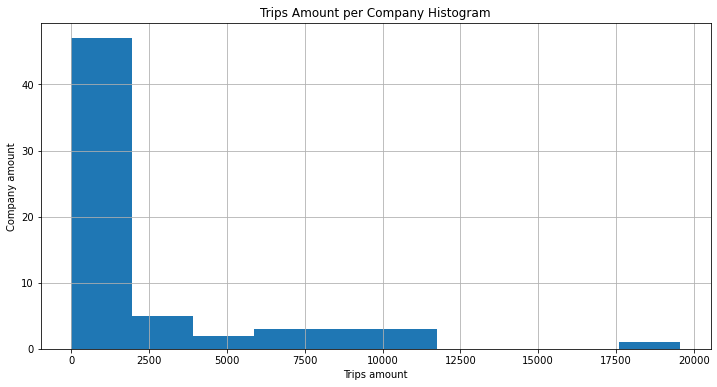

In [93]:
plt.figure(figsize=(12,6))
companies['trips_amount'].hist()
plt.title('Trips Amount per Company Histogram')
plt.xlabel('Trips amount')
plt.ylabel('Company amount')
plt.show()

The average of the trips amount is 2145. 75% companies have less than 2106 trips. There are some outliers up to 19558 trips. 

In [94]:
top10_company = companies.sort_values(by='trips_amount', ascending=False).head(10)
top10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Text(0, 0.5, 'Trips Amount')

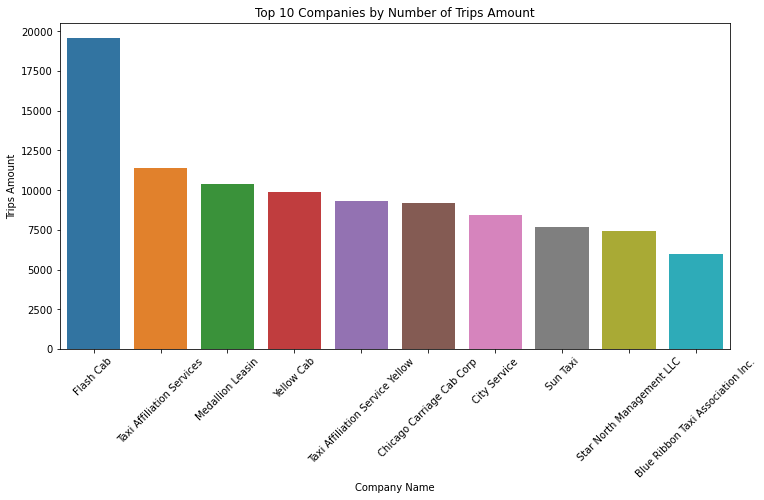

In [95]:
plt.figure(figsize=(12,6))
sns.barplot(x="company_name", y="trips_amount", data=top10_company)
plt.title('Top 10 Companies by Number of Trips Amount')
plt.xlabel("Company Name")
plt.xticks(rotation=45)
plt.ylabel("Trips Amount")

Flash Cab is the most popular taxi company.

In [96]:
companies['total_trips_percent'] = companies['trips_amount'] / companies['trips_amount'].sum() * 100

In [97]:
companies.sort_values(by='total_trips_percent', ascending=False).head(10)

,company_name,trips_amount,total_trips_percent
0,Flash Cab,19558,14.243578
1,Taxi Affiliation Services,11422,8.318343
2,Medallion Leasin,10367,7.550014
3,Yellow Cab,9888,7.201171
4,Taxi Affiliation Service Yellow,9299,6.772218
5,Chicago Carriage Cab Corp,9181,6.686282
6,City Service,8448,6.152457
7,Sun Taxi,7701,5.608436
8,Star North Management LLC,7455,5.429281
9,Blue Ribbon Taxi Association Inc.,5953,4.335414


Flash Cab is the most popular and top leader in the taxi company market, almost double the second one. While others taxi companies are close each other and very tight competition. 

## Dropoffs <a class="anchor" id="dropoffs"></a>

In [98]:
dropoffs.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [99]:
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [100]:
dropoffs.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [101]:
dropoffs.describe(include='object')

,dropoff_location_name
count,94
unique,94
top,Hermosa
freq,1


In [102]:
dropoffs.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

No missing value

In [103]:
dropoffs.duplicated().sum()

0

No duplicate

In [104]:
dropoffs['dropoff_location_name'].nunique()

94

There are 94 unique dropoff locations.

In [105]:
dropoffs['average_trips'].describe()

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

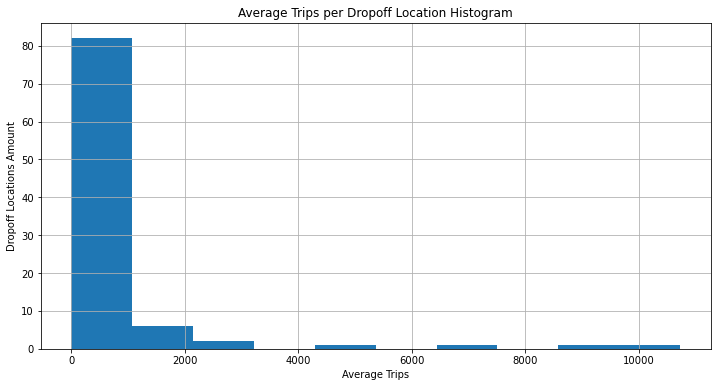

In [106]:
plt.figure(figsize=(12,6))
dropoffs['average_trips'].hist()
plt.title('Average Trips per Dropoff Location Histogram')
plt.xlabel("Average Trips")
plt.ylabel("Dropoff Locations Amount")
plt.show()

The average of trip amount is 600. 75% dropoff locations have less than 299 trips. There are some outliers that reach 10727 trips.

Top 10 neghbourhoods by number of dropoffs

In [107]:
top10_dropoffs= dropoffs.sort_values(by='average_trips', ascending=False).head(10)
top10_dropoffs

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


The top 10 dropoff location or neighborhoods based on number of trips: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campud, Gold Coast, and Sheffield & De Paul.

Text(0, 0.5, 'Average Trips')

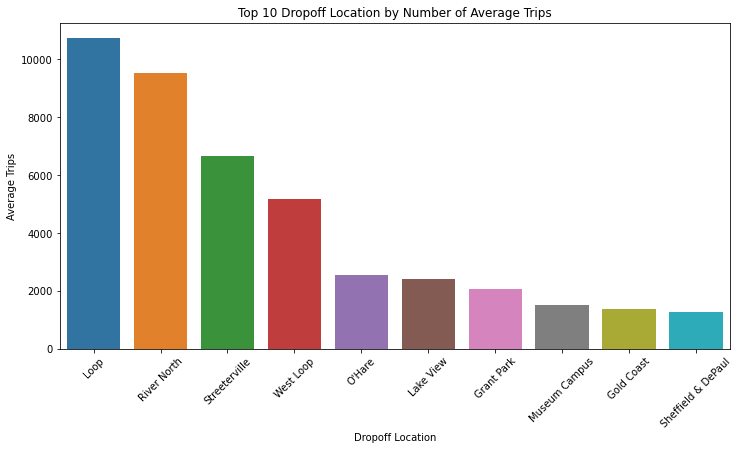

In [108]:
plt.figure(figsize=(12,6))
sns.barplot(x="dropoff_location_name", y="average_trips", data=top10_dropoffs)
plt.title('Top 10 Dropoff Location by Number of Average Trips')
plt.xlabel("Dropoff Location")
plt.xticks(rotation=45)
plt.ylabel("Average Trips")
plt.show()

Loop is the most popular dropoff location, followed by River North, Streeterville and West Loop. 

In [109]:
dropoffs['total_trips_percent'] = dropoffs['average_trips'] / dropoffs['average_trips'].sum() * 100
dropoffs.sort_values(by='total_trips_percent', ascending=False).head(10)

,dropoff_location_name,average_trips,total_trips_percent
0,Loop,10727.466667,19.021798
1,River North,9523.666667,16.887236
2,Streeterville,6664.666667,11.817696
3,West Loop,5163.666667,9.156143
4,O'Hare,2546.900000,4.516128
5,Lake View,2420.966667,4.292825
6,Grant Park,2068.533333,3.667895
7,Museum Campus,1510.000000,2.677511
8,Gold Coast,1364.233333,2.419040
9,Sheffield & DePaul,1259.766667,2.233801


In [110]:
dropoffs.iloc[0:4]['total_trips_percent'].sum()

56.88287378682103

The top 4 dropoff location are 57% of total trips from all dropoff location.

## Loop Ohare <a class="anchor" id="loopohare"></a>

In [111]:
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [112]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Change start_ts data type to datetime

In [113]:
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'])

In [114]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [115]:
loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [116]:
loop_ohare.describe(include='object')

,weather_conditions
count,1068
unique,2
top,Good
freq,888


In [117]:
loop_ohare['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [118]:
loop_ohare['weather_conditions'].value_counts()/len(loop_ohare)*100

Good    83.146067
Bad     16.853933
Name: weather_conditions, dtype: float64

- There are 888 good weather which is 83.15%
- There are 180 bad weather which is 16.85%

In [119]:
loop_ohare.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

No missing value

In [120]:
loop_ohare['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

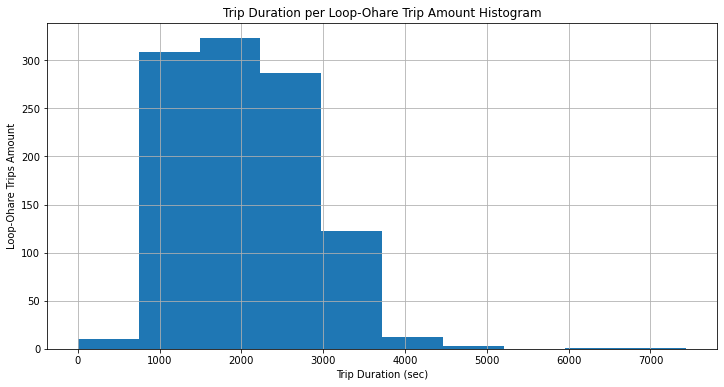

In [121]:
plt.figure(figsize=(12,6))
loop_ohare['duration_seconds'].hist()
plt.title('Trip Duration per Loop-Ohare Trip Amount Histogram')
plt.xlabel("Trip Duration (sec)")
plt.ylabel("Loop-Ohare Trips Amount")
plt.show()

The average trip duration is 2071 sec. 75% loop ohare trips amount has less than 2580 sec.

## Conclusion

- Flash Cab is the most popular and top leader in the taxi company market, almost double the second one. While others taxi companies are close each other and very tight competition
- Zuber should adapt Flash Cab model or partner with them to get clear understanding what make it really different than other Chicago taxi companies.
- Loop is the most popular dropoff location, followed by River North, Streeterville and West Loop. This top 4 dropoff locations are 57% of total trips from all dropoff location. Checking the map from https://www.choosechicago.com/neighborhoods/ the pattern is clear that the top 4 dropoff location or neighborhoods are next to each other or surrounding Loop. So the most popular area from trips is in Loop and its around neighborhood. 
- In Loop Ohare on Saturday, November 2017 there are 888 good weather which is 83.15% and 180 bad weather which is 16.85% 

# Step 5.Hypothesis Testing - Python <a class="anchor" id="hypotest2"></a>

Test the hypothesis:

**"The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays."**

- H0 (Null Hypothesis): Average Duration of rides from Loop neighborhood to O'Hare International Airport on Good Weather Days == Average Trip Duration on Bad Weather Days
- HA (Alternative Hypothesis): Average Duration of rides from Loop neighborhood to O'Hare International Airport  on Good Weather Days != Average Trip Duration on Bad Weather Days
- Confidence Level: 95% (Alpha 5%)

In [124]:
alpha = 0.05

sample_good = loop_ohare.query('weather_conditions == "Good"')['duration_seconds']
sample_bad = loop_ohare.query('weather_conditions == "Bad"')['duration_seconds']

In [125]:
st.levene(sample_good, sample_bad, center='mean')

LeveneResult(statistic=0.7184273561022895, pvalue=0.3968505113995001)

The p-value of the test is more than the threshold value of 0.05 and hence, the sample groups have equal variance. Equal Variance is True

In [126]:
results = st.ttest_ind(sample_good,sample_bad, equal_var=True)

print('sample good weather mean: ', sample_good.mean())
print('sample bad weather mean: ',sample_bad.mean())
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

sample good weather mean:  1999.6756756756756
sample bad weather mean:  2427.2055555555557
p-value:  6.517970327099473e-12
We reject the null hypothesis


## Conclusion
- With Levene Test, the sample group have equal variance since the pvalue of Levene test is more than threshold of 0.05.
- With confidence level 95%, we reject the null hypothesis, so the Average Duration of rides from Loop neighborhood to O'Hare International Airport on Good Weather Days is not equal to Average Trip Duration on Bad Weather Days. It means **The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**
- Duration of rides on **bad weather** day is **longer** than on good weather days.

# Step 6.Overall Conclusion <a class="anchor" id="allconclusion"></a>

- **Flash Cab** is the most **popular** and the **leader** of taxi company market in Chicago, doing almost double the trips as the next taxi company Taxi Affiliation Services. Zuber should adapt Flash Cab model or partner with them to get clear understanding what make it's succesful and really different than other Chicago taxi companies.
- The most popular trips are in **Loop** area and its **surrounding** neighborhood. Zuber should consider operate more in that popular area or there might be an opportunity to target the market outside the area that is not covered with current market. 
-  The common taxi color associating with **Yellow** color seem **successful**. For every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7. 2017, Yellow Cab has the most trips. Taxi Affiliate Service has yellow color and associate with yellow cab and yellow group based on google search. Flash Cab has white and blue color based on google search and Flash Cab website. Zuber should consider branding its name associate with yellow colors or identified with the most popular company Flash Cab that using **Blue/White**. 
- **Weather** has an **effect** on duration of the rides. Trips duration on **bad weather is longer** than on good weather. Zuber should consider change the pricing based on weather since longer trips means the taxi is busy and less supply. 
